In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/mushrooms_clean2.csv")

In [3]:
data.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,True,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,True,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,True,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,True,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,False,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [4]:
x = data.drop(['class'], axis = 1)
y = data['class']

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(y)

In [6]:
print(y)

[1 0 0 ... 0 1 0]


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
x = onehotencoder.fit_transform(x).toarray()

In [8]:
print(x[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [9]:
from sklearn.model_selection import train_test_split
#np.random.seed(15072021)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print("\nX_train, y_train: ", (x_train.shape, y_train.shape))
print("\nX_test, y_test: ", (x_train.shape, y_test.shape))


X_train, y_train:  ((6499, 117), (6499,))

X_test, y_test:  ((6499, 117), (1625,))


In [10]:
print("\nX_train, y_train: ", (x_train.shape, y_train.shape))
print("\nX_test, y_test: ", (x_train.shape, y_test.shape))


X_train, y_train:  ((6499, 117), (6499,))

X_test, y_test:  ((6499, 117), (1625,))


In [11]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression()
lm_model.fit(x_train, y_train)

LinearRegression()

In [12]:
y_pred = lm_model.predict(x_test)

In [13]:
print(y_test.dtype, y_pred.dtype)

int32 float64


In [14]:
y_pred = np.array(y_pred, dtype=int)

In [15]:
# Regresión lineal
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
matriz = confusion_matrix(y_test, y_pred)
recall_lm = recall_score(y_test, y_pred)
ac_lm = accuracy_score(y_test, y_pred)


In [16]:
recall_lm

0.4320827943078913

In [17]:
# Ridge
from sklearn import linear_model 
ridge = linear_model.Ridge(alpha = 0.5)
ridge.fit(x_train, y_train)

Ridge(alpha=0.5)

In [18]:
y_pred = ridge.predict(x_test)

In [19]:
y_pred = np.array(y_pred, dtype=int)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
matriz = confusion_matrix(y_test, y_pred)
recall_ridge = recall_score(y_test, y_pred)
ac_ridge = accuracy_score(y_test, y_pred)

In [21]:
print(recall_ridge, ac_ridge)

0.4683053040103493 0.7470769230769231


In [22]:
print(matriz)

[[852   0]
 [411 362]]


In [23]:
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
y_pred = ridge.predict(x_test)
y_pred = np.array(y_pred, dtype=int)

In [24]:
matriz = confusion_matrix(y_test, y_pred)
recall_ridge2 = recall_score(y_test, y_pred)
ac_ridge2 = accuracy_score(y_test, y_pred)

In [25]:
matriz

array([[852,   0],
       [411, 362]], dtype=int64)

In [26]:
print(recall_ridge2, ac_ridge2)

0.4683053040103493 0.7470769230769231


In [27]:
# LASSO
model_lasso = linear_model.Lasso(alpha = 0.1)
model_lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [28]:
y_pred = ridge.predict(x_test)
y_pred = np.array(y_pred, dtype=int)

In [29]:
matriz = confusion_matrix(y_test, y_pred)
recall_lasso = recall_score(y_test, y_pred)
ac_lasso = accuracy_score(y_test, y_pred)

In [30]:
matriz

array([[852,   0],
       [411, 362]], dtype=int64)

In [31]:
recall_lasso

0.4683053040103493

In [32]:
ac_lasso

0.7470769230769231

In [33]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
arbol.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [34]:
y_pred = arbol.predict(x_test)
y_pred = np.array(y_pred, dtype = int)

In [35]:
matriz = confusion_matrix(y_test, y_pred)
recall_tree = recall_score(y_test, y_pred)
ac_lasso = accuracy_score(y_test, y_pred)

In [36]:
recall_tree

1.0

In [37]:
matriz

array([[852,   0],
       [  0, 773]], dtype=int64)

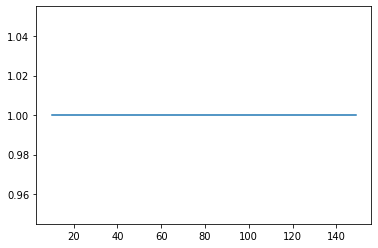

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,150):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(recall_score(y_test, y_pred))
#print(mylist)
plt.plot(list(range(10,150)), list1)
plt.show()

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion = 'entropy', random_state = 0, n_estimators = 40)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [40]:
y_pred = classifier.predict(x_test)
y_pred = np.array(y_pred, dtype = int)


In [41]:
matriz = confusion_matrix(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
ac_rf = accuracy_score(y_test, y_pred)

In [42]:
matriz

array([[852,   0],
       [  0, 773]], dtype=int64)

In [43]:
recall_rf

1.0

In [44]:
ac_rf

1.0

In [45]:
models = np.array(["OLS Model", "Ridge", "Lasso", "Tree classifier", "Random Forest"])
recall = np.array([recall_lm, recall_ridge, recall_lasso, recall_tree, recall_rf])

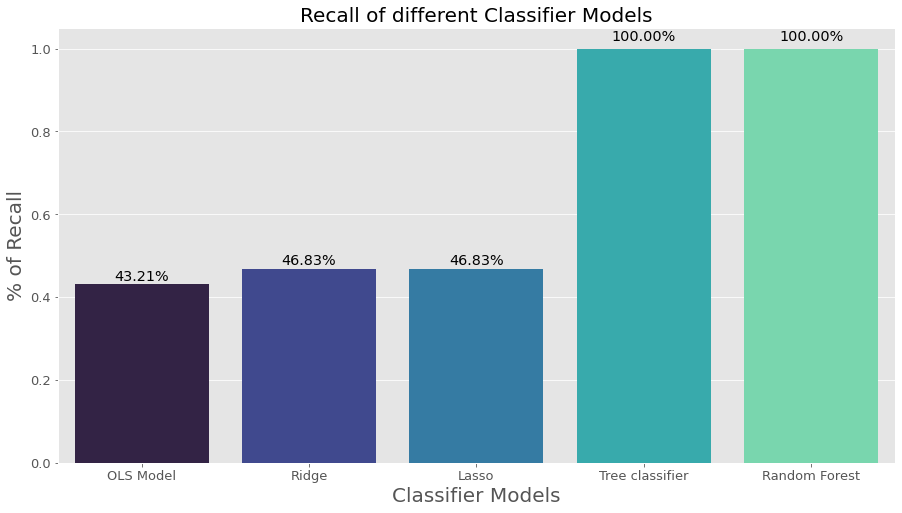

In [46]:
# Visualising the accuracy score of each classification model
plt.rcParams['figure.figsize']=15,8 
plt.style.use('ggplot')
ax = sns.barplot(x=models, y=recall, palette = "mako", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Recall", fontsize = 20)
plt.title("Recall of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large', color = 'black')
plt.show()